In [1]:
!pip install --force-reinstall catboost

  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached plotly-6.0.1-py3-none-any.whl.metadata (6.7 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.

In [1]:
#Reading data
import pandas as pd


#Fixings warnings
import warnings
warnings.filterwarnings('ignore')


#For mathematical operations
import numpy as np


#Visualisation
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff


#Data spliting
from sklearn.model_selection import train_test_split

In [2]:
# # Please uncomment this out when you are running this lab on google colab!
import os

# # Set KaggleHub cache to a directory inside /content/
os.environ["KAGGLEHUB_CACHE"] = "/content/data"

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

Path to dataset files: /content/data/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2


In [4]:
sleep_data=pd.read_csv('/content/data/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv', na_values=[], keep_default_na=False)

#head() for display the first 5 rows
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
sleep_data.info() # for empty and type of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
#for statistical info
sleep_data.describe().style.background_gradient(cmap='BuPu') #for colored output

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [7]:
#for statistical info including string values
sleep_data.describe(include='O').style.set_properties(**{'background-color': '#4A235A',
                                                      'color': '#E2EEF3'})

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


In [8]:
columns_name=colored(sleep_data.columns, 'magenta',None, attrs=["blink"]) #for show names of columns
print(columns_name)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [9]:
#for colored text output ( Text ,Text colors ,Text highlights , Attributes)
number_of_values=colored(sleep_data.nunique(), "magenta",None, attrs=["blink"])

print(number_of_values) #for number of values of columns

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


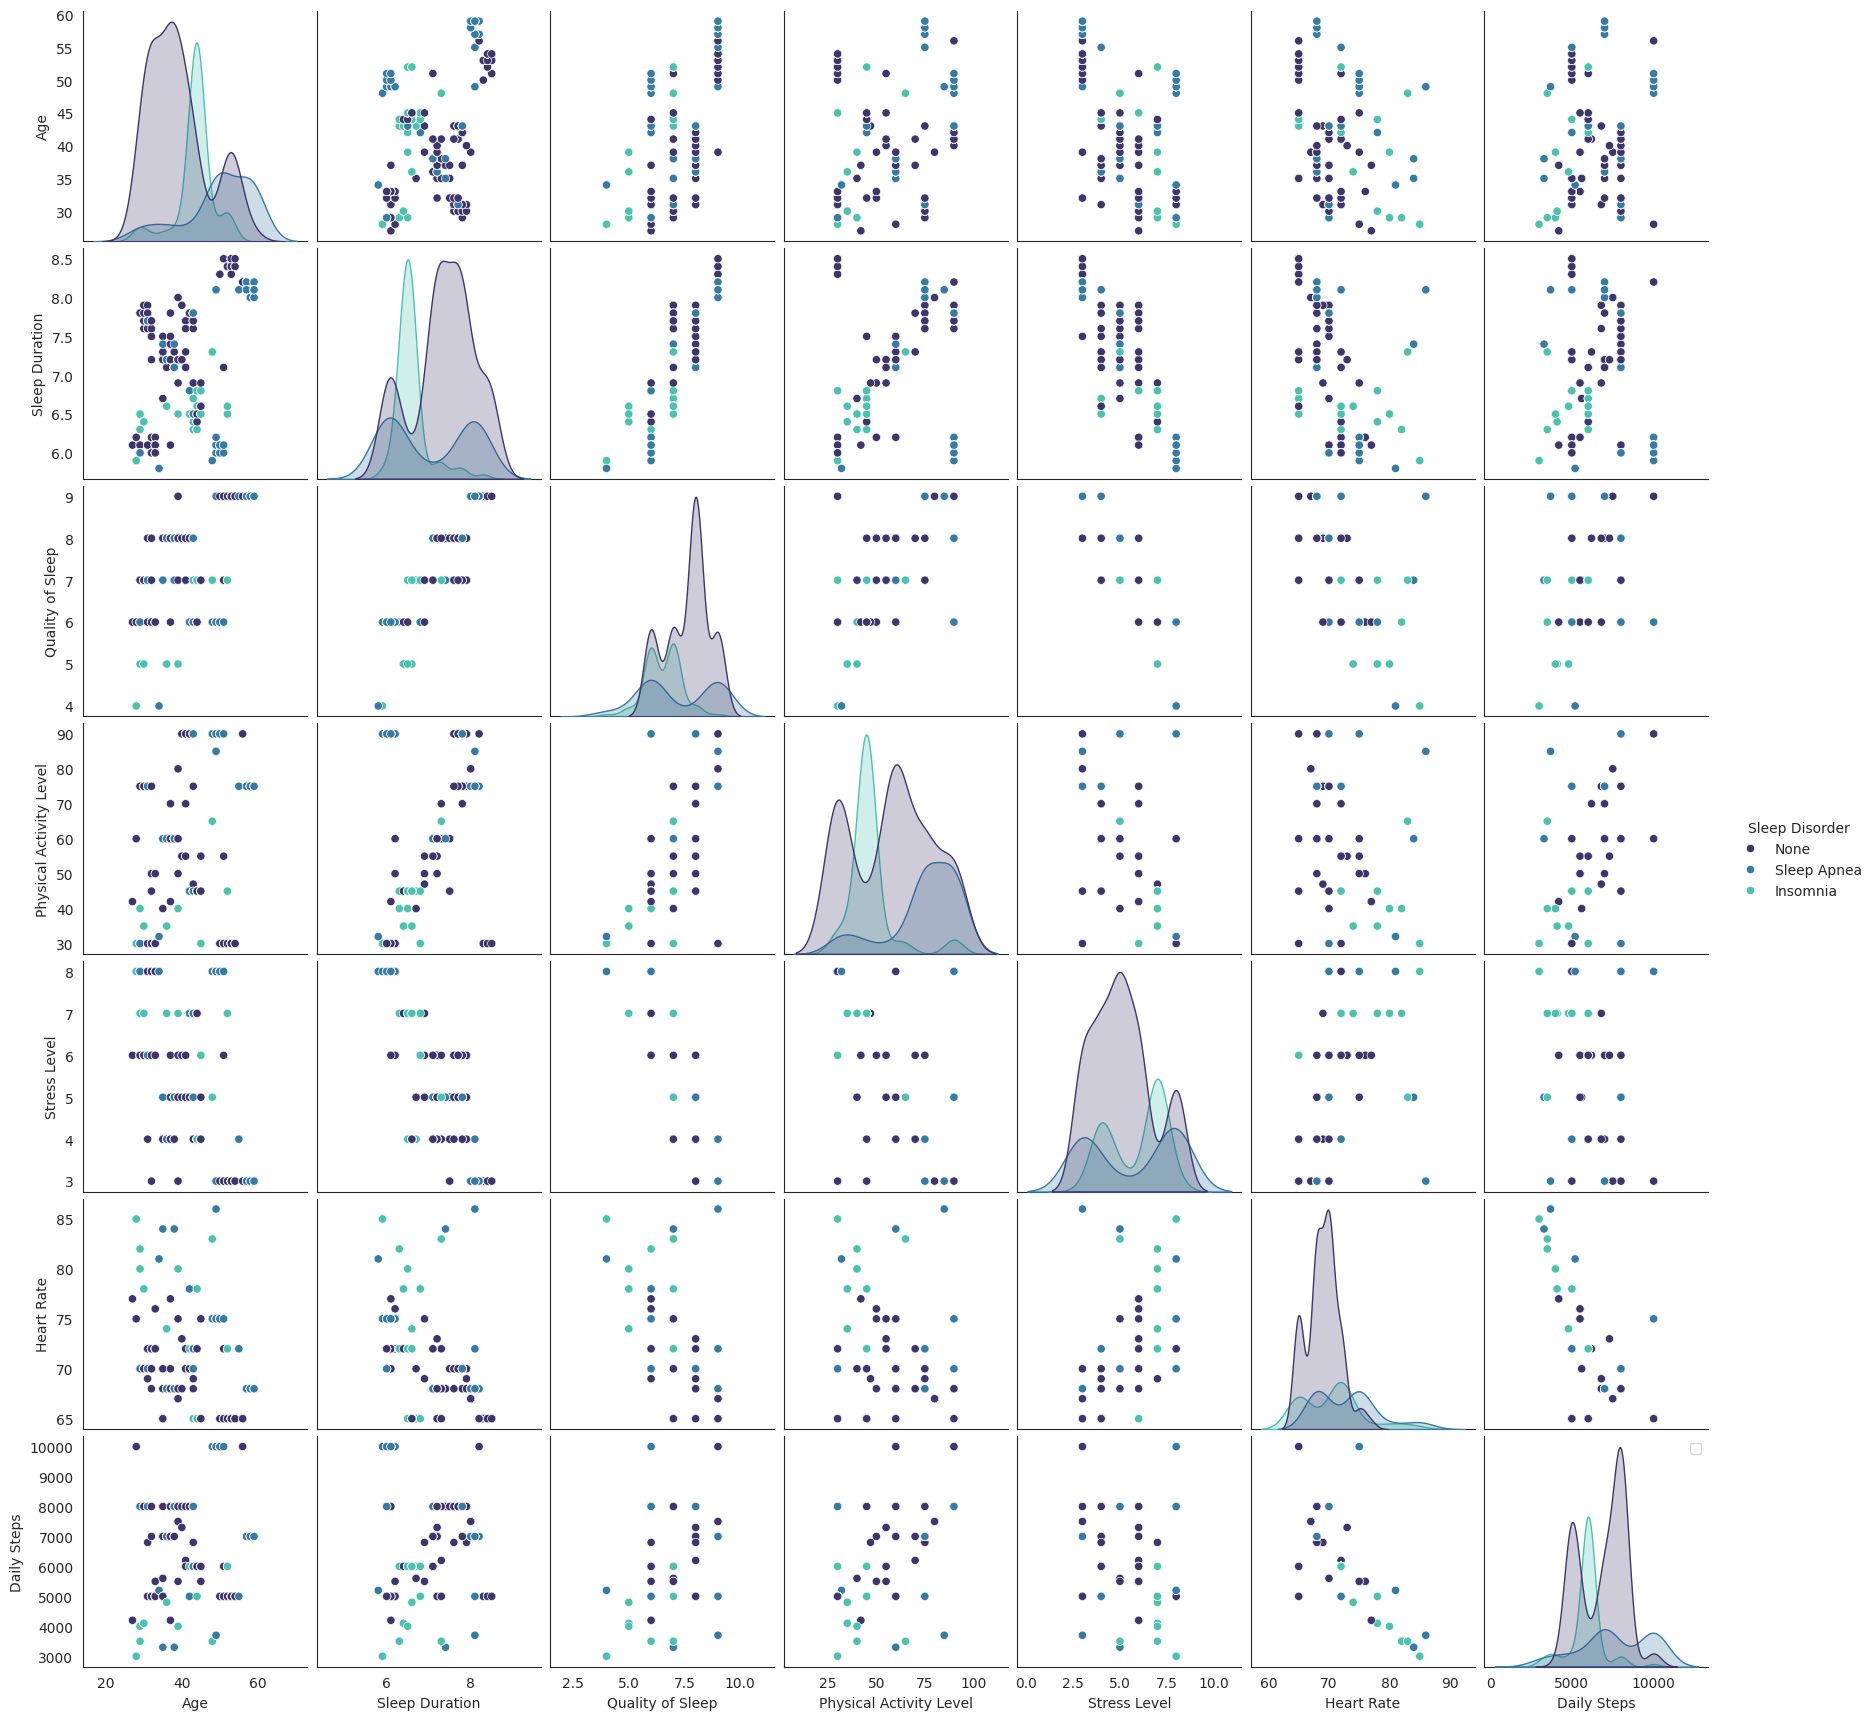

In [10]:
sns.set_style("white")
sns.pairplot(data=sleep_data.drop('Person ID', axis=1), hue='Sleep Disorder', palette='mako')
plt.legend()
plt.show()

In [11]:
classes=colored(sleep_data['Sleep Disorder'].unique(), "magenta",None, attrs=["blink"])
print('The outputs from the classification are :',classes)

The outputs from the classification are : ['None' 'Sleep Apnea' 'Insomnia']


In [12]:
sleep_data['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
None,219
Sleep Apnea,78
Insomnia,77


In [13]:
fig=px.histogram(sleep_data,x='Sleep Disorder',
                 barmode="group",color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)


fig.update_layout(title='<b>Distribution of persons have sleep disorder or not</b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0',
                 showlegend=True)


fig.update_yaxes(showgrid=False)

fig.show()

In [14]:
Gender=colored(sleep_data['Gender'].unique(), "magenta",None, attrs=["blink"])
print('The values of Sex column are :',Gender)

The values of Sex column are : ['Male' 'Female']


In [15]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

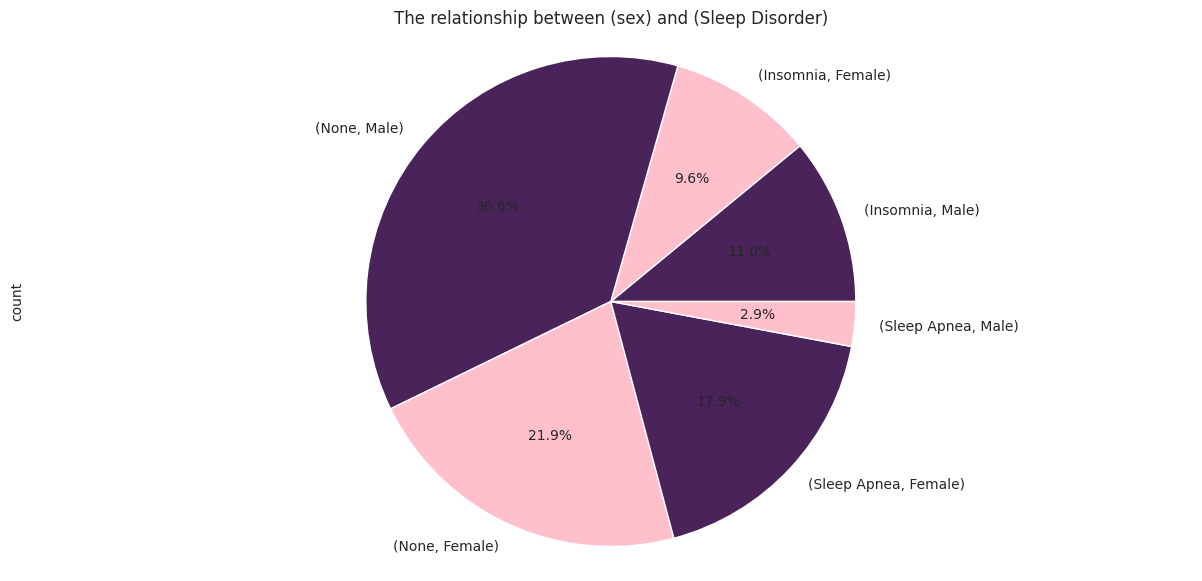

In [16]:
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.1f%%',figsize=(15,7),
                                                                       colors=['#4A235A','pink','#4A235A','pink','#4A235A','pink'])
plt.title('The relationship between (sex) and (Sleep Disorder)')
plt.axis('equal')
plt.show()

In [17]:
jobs=colored(sleep_data['Occupation'].unique(), "magenta",None, attrs=["blink"])
print('The types of jobs that exist are :',jobs)

The types of jobs that exist are : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [18]:
sleep_data.groupby('Sleep Disorder')['Occupation'].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
None            Doctor                  64
                Engineer                57
                Lawyer                  42
                Accountant              30
                Nurse                    9
                Teacher                  9
                Software Engineer        3
                Salesperson              2
                Scientist                2
                Manager                  1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                Sales Representative     2
                Scientist                2
                Engineer                 1
                Salesperson              1
Name: count, dtype: int64

In [19]:
fig=px.treemap(sleep_data,path=[px.Constant('Jobs'),'Sleep Disorder','Occupation'],
               color='Sleep Disorder',
              color_discrete_sequence=['#EBDEF0','#C39BD3','#4A235A'])


fig.update_layout(title='<b>The effect of job on sleep</b>..',
                 title_font={'size':20})


fig.show()

In [20]:
sleep_data.pivot_table(index='Quality of Sleep',columns='Sleep Disorder',values='Sleep Duration',aggfunc='mean').style.background_gradient(cmap='BuPu')

Sleep Disorder,Insomnia,None,Sleep Apnea
Quality of Sleep,,,
4,5.900000,nan,5.850000
5,6.500000,nan,6.500000
6,6.371875,6.117500,6.118182
7,6.638235,7.540000,7.500000
8,7.520000,7.399010,7.366667
9,8.300000,8.365789,8.096875


In [21]:
fig=px.sunburst(sleep_data,path=[px.Constant('Sleep quality'),'Sleep Disorder','Quality of Sleep'],
               color='Sleep Disorder',values='Sleep Duration',
              color_discrete_sequence=['pink','#4A235A','#FFF3FD'],
              hover_data=['Gender'])

fig.update_layout(title='<b>The effect of quality of sleep on sleep </b>..',
                 title_font={'size':25})

fig.show()

In [22]:
fig = px.violin(sleep_data, x="Sleep Disorder",y='Physical Activity Level',
                 color='Sleep Disorder',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 violinmode='overlay')


fig.update_layout(title='<b>The effect of activities on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')

fig.update_yaxes(showgrid=False)
fig.show()

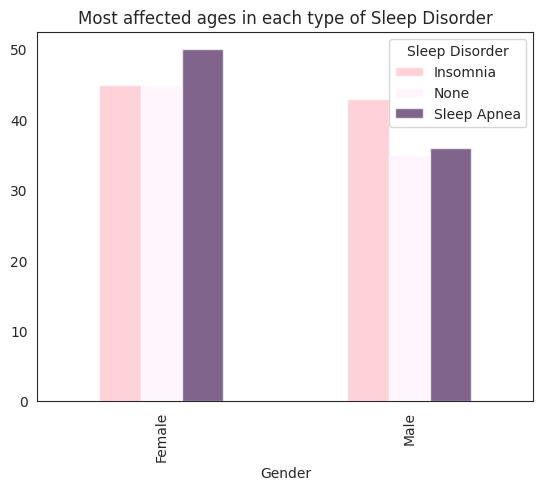

In [23]:
sleep_data.pivot_table(index='Gender',columns='Sleep Disorder',values='Age',aggfunc='median').plot(kind='bar',color={'#FFF3FD','#4A235A','pink'},
                                                                                                   title='Most affected ages in each type of Sleep Disorder',
                                                                                                    label='Age',alpha=.7)


plt.show()

In [24]:
fig=px.ecdf(sleep_data,x='Age',
            color='Sleep Disorder',
            color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
fig=px.histogram(sleep_data,x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)



fig.update_layout(title={'text':'<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                          'font':{'size': 24,'family': 'Serif'}},
                  showlegend=True,
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)




fig.show()

In [32]:
fig=px.scatter_3d(sleep_data,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title={'text':'<b>The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                          'font':{'size': 20,'family': 'Serif'}},
                  showlegend=True)



fig.show()

In [33]:
sleep_data.pivot_table(index='Stress Level',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

In [34]:
fig=px.histogram(sleep_data,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 opacity=.8)


fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..',title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

In [35]:
BMI_Category=colored(sleep_data['BMI Category'].unique(), "magenta",None, attrs=["blink"])
print('The values of BMI Category column are :',BMI_Category)

The values of BMI Category column are : ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [36]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

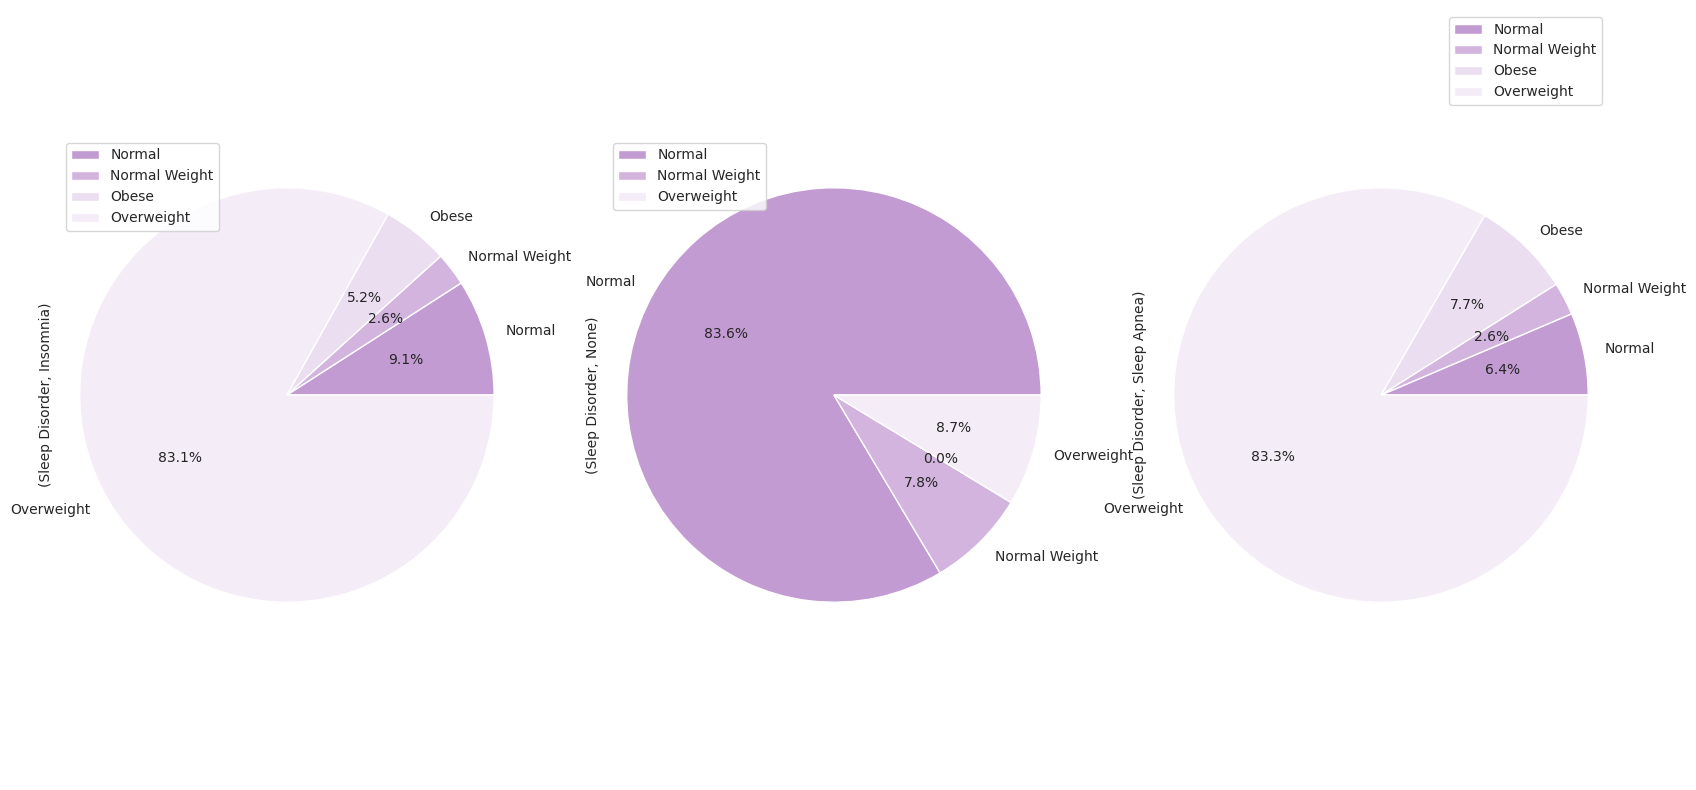

In [37]:
sleep_data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.show()

In [38]:
sleep_data.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


<Axes: >

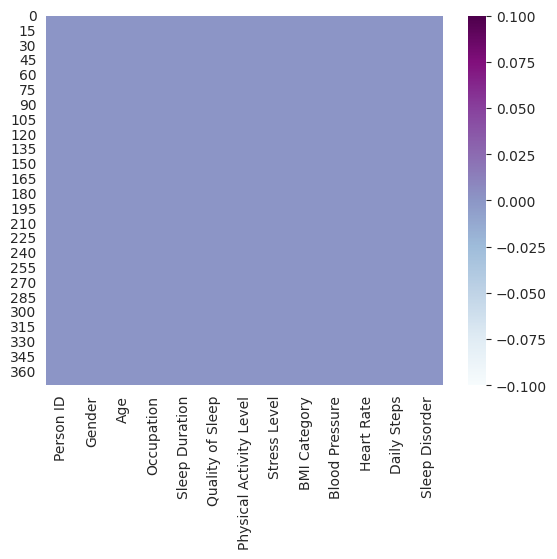

In [39]:
sns.heatmap(sleep_data.isna(),cmap='BuPu')

In [40]:
sleep_data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [41]:
sleep_data['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [42]:
sleep_data['Blood Pressure']=sleep_data['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

In [43]:
sleep_data["Age"]=pd.cut(sleep_data["Age"],2)
sleep_data["Heart Rate"]=pd.cut(sleep_data["Heart Rate"],4)
sleep_data["Daily Steps"]=pd.cut(sleep_data["Daily Steps"],4)
sleep_data["Sleep Duration"]=pd.cut(sleep_data["Sleep Duration"],3)
sleep_data["Physical Activity Level"]=pd.cut(sleep_data["Physical Activity Level"],4)

In [44]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers
LE=LabelEncoder()

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    sleep_data[label]=LE.fit_transform(sleep_data[label])

In [45]:
sleep_data.drop(['Person ID'], axis=1, inplace=True)

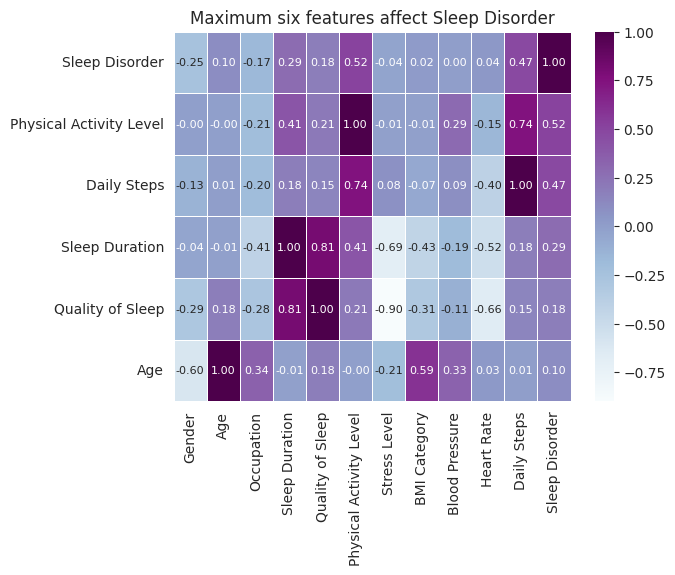

In [46]:
correlation=sleep_data.corr()
max_6_corr=correlation.nlargest(6,"Sleep Disorder")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8},linewidths=0.5,cmap='BuPu')
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

In [47]:
x=sleep_data.iloc[:,:-1]
y=sleep_data.iloc[:,-1]

x_shape=colored(x.shape, "magenta",None, attrs=["blink"])
y_shape=colored(y.shape, "magenta",None, attrs=["blink"])
print('The dimensions of x is : ',x_shape)
print('The dimensions of y is : ',y_shape)

The dimensions of x is :  (374, 11)
The dimensions of y is :  (374,)


In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

In [103]:
x_train_shape=colored(x_train.shape, "magenta",None, attrs=["blink"])
x_test_shape=colored(x_test.shape, "magenta",None, attrs=["blink"])
y_train_shape=colored(y_train.shape, "magenta",None, attrs=["blink"])
y_test_shape=colored(y_test.shape, "magenta",None, attrs=["blink"])

print("x train dimensions :",x_train_shape)
print("x test dimensions: ",x_test_shape)
print("y train dimensions :",y_train_shape)
print("y test dimensions :",y_test_shape)

x train dimensions : (250, 11)
x test dimensions:  (124, 11)
y train dimensions : (250,)
y test dimensions : (124,)


In [104]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(x_train,y_train)

In [105]:
LR_training_score=colored(round(LR.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
LR_testing_score=colored(round(LR.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print(f"LR training score :",LR_training_score)
print("LR testing score :",LR_testing_score)

LR training score : 90.8
LR testing score : 91.94


In [106]:
LR_y_pred=LR.predict(x_test)

In [107]:
from xgboost import XGBClassifier
xgb=XGBClassifier().fit(x_train,y_train)

In [108]:
xgb_training_score=colored(round(xgb.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
xgb_testing_score=colored(round(xgb.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("xgb training score :",xgb_training_score)
print("xgb testing score :",xgb_testing_score)

xgb training score : 93.2
xgb testing score : 91.13


In [109]:
xgb_y_pred=xgb.predict(x_test)

In [110]:
from catboost import CatBoostClassifier
CBC=CatBoostClassifier(verbose=False).fit(x_train,y_train)

In [111]:
xgb_training_score=colored(round(xgb.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
xgb_testing_score=colored(round(xgb.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("xgb training score :",xgb_training_score)
print("xgb testing score :",xgb_testing_score)

xgb training score : 93.2
xgb testing score : 91.13


In [112]:
xgb_y_pred=xgb.predict(x_test)

In [113]:
from catboost import CatBoostClassifier
CBC=CatBoostClassifier(verbose=False).fit(x_train,y_train)

In [114]:
CBC_training_score=colored(round(CBC.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
CBC_testing_score=colored(round(CBC.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("CBC training score :",CBC_training_score)
print("CBC testing score :",CBC_testing_score)

CBC training score : 93.2
CBC testing score : 91.13


In [115]:
CBC_y_pred=CBC.predict(x_test)

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier().fit(x_train,y_train)

In [117]:
GBC_training_score=colored(round(GBC.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
GBC_testing_score=colored(round(GBC.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("GBC training score :",GBC_training_score)
print("GBC testing score :",GBC_testing_score)

GBC training score : 93.2
GBC testing score : 91.13


In [118]:
GBC_y_pred=GBC.predict(x_test)

In [119]:
from sklearn.svm import SVC
svc = SVC().fit(x_train,y_train)

In [120]:
svc_training_score=colored(round(svc.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
svc_testing_score=colored(round(svc.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("svc training score :",svc_training_score)
print("svc testing score :",svc_testing_score)

svc training score : 88.8
svc testing score : 87.9


In [121]:
svc_y_pred=svc.predict(x_test)

In [122]:
from sklearn.metrics import confusion_matrix

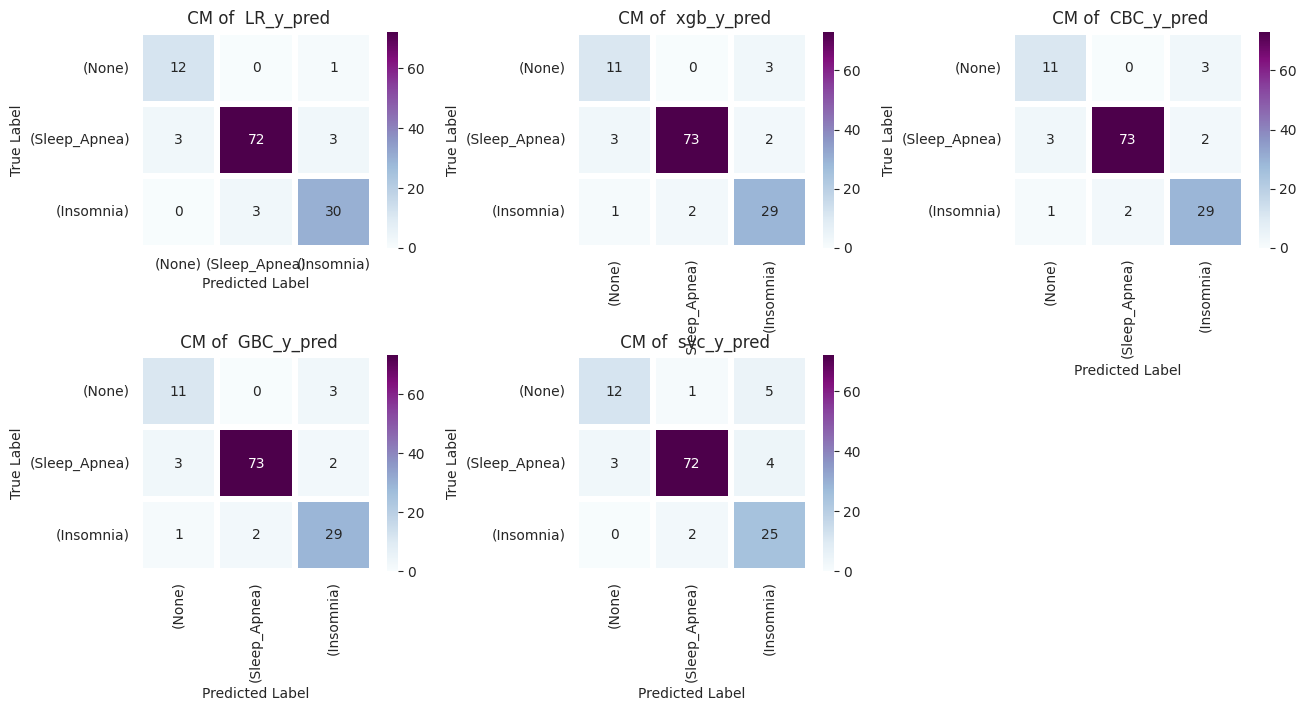

In [123]:
models_predictions=[LR_y_pred,xgb_y_pred,CBC_y_pred,GBC_y_pred,svc_y_pred]
model={1:'LR_y_pred',2:'xgb_y_pred',3:'CBC_y_pred',4:'GBC_y_pred',5:'svc_y_pred'}


plt.figure(figsize=(15,7))
for i,y_pred in enumerate(models_predictions,1) :

    cm = confusion_matrix(y_pred,y_test)

    plt.subplot(2,3,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'],
                yticklabels=['(None)','(Sleep_Apnea)','(Insomnia)'])


    plt.title(' CM of  '+ model[i])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [125]:
import joblib

# Save the trained model
joblib.dump(xgb, "/content/drive/MyDrive/Hackathon Models/2. Sleep Pattern and Fatigue Monitoring/xgb_sleep_model.pkl")

# Save label encoder (for Sleep Disorder only, as per your current use)
joblib.dump(LE, "/content/drive/MyDrive/Hackathon Models/2. Sleep Pattern and Fatigue Monitoring/label_encoder.pkl")


['/content/drive/MyDrive/Hackathon Models/2. Sleep Pattern and Fatigue Monitoring/label_encoder.pkl']